# step 01 
knn regressor

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.Gender.value_counts()

Male      5000
Female    3555
Name: Gender, dtype: int64

In [5]:
df.isnull()

,Gender,Height,Weight
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
8550,False,False,False
8551,False,False,False
8552,False,False,False
8553,False,False,False


In [6]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:

df.replace(to_replace=["Male", "Female"], value=[1,0], inplace=True) #male=1 ' female=0'

In [8]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [9]:
df.shape

(8555, 3)

In [10]:
x = df.drop('Weight', axis=1)
y = df[['Weight']]

In [11]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [12]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [13]:
x.shape

(8555, 2)

In [14]:
y.shape

(8555, 1)

In [15]:
x.mean()

Gender     0.584454
Height    66.809925
dtype: float64

In [16]:
x.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       Gender     Height
0          1  73.847017
1          1  68.781904
2          1  74.110105
3          1  71.730978
4          1  69.881796
...      ...        ...
8550       0  60.483946
8551       0  63.423372
8552       0  65.584057
8553       0  67.429971
8554       0  60.921791

[8555 rows x 2 columns]>

In [17]:
y.mean()

Weight    165.632735
dtype: float64

In [18]:
y.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of           Weight
0     241.893563
1     162.310473
2     212.740856
3     220.042470
4     206.349801
...          ...
8550  110.565497
8551  129.921671
8552  155.942671
8553  151.678405
8554  131.253738

[8555 rows x 1 columns]>

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train, test = train_test_split(df, test_size=.30) 

In [21]:
train.shape

(5988, 3)

In [22]:
test.shape

(2567, 3)

In [23]:
train.head()

,Gender,Height,Weight
7915,0,59.939405,110.614615
8276,0,63.863362,128.285494
1120,1,68.156589,181.051742
7448,0,66.819348,149.658877
8394,0,63.692157,136.892890


In [24]:
test.head()

,Gender,Height,Weight
5448,0,65.978577,141.113931
8483,0,69.180081,165.256627
7924,0,71.277507,162.313393
1901,1,67.760095,172.216451
1640,1,70.821431,194.327152


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.30, random_state=0) 

In [26]:
xtrain.head()

,Gender,Height
3197,1,69.689848
4394,1,66.299441
7711,0,63.261527
7019,0,62.035319
898,1,67.272171


In [27]:
ytrain.head()

,Weight
3197,186.377448
4394,159.235988
7711,126.426793
7019,119.418135
898,187.363366


In [28]:
xtest.head()

,Gender,Height
541,1,63.867921
3209,1,68.688931
7598,0,65.865244
5170,0,66.259558
2423,1,67.290776


In [29]:
ytest.head()

,Weight
541,174.473363
3209,178.507500
7598,155.248900
5170,138.839940
2423,154.718344


# lenear regreation

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [33]:
m = lr.coef_
m

array([[19.67647385,  5.95976283]])

In [34]:
c = lr.intercept_
c

array([-244.11178083])

In [35]:
yp = 19.67647385*1+5.95976283*69+-244.11178083
yp

186.78832828999998

In [36]:
lr.predict([[1,69]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[186.78832817]])

In [37]:
lr.coef_

array([[19.67647385,  5.95976283]])

In [38]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [39]:
df['predicted_Weight'] = lr.predict(x)
df.head()

,Gender,Height,Weight,predicted_Weight
0,1,73.847017,241.893563,215.675400
1,1,68.781904,162.310473,185.488528
2,1,74.110105,212.740856,217.243344
3,1,71.730978,220.042470,203.064312
4,1,69.881796,206.349801,192.043622


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [42]:
mse

102.30154155088874

In [43]:
mae

8.029100527825232

In [44]:
lr.score(xtest, ytest)

0.9025307579174771

In [45]:
lr.predict([[1,69]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[186.78832817]])

# knn regreassion

In [46]:

from sklearn.neighbors import KNeighborsRegressor

In [47]:
kn = KNeighborsRegressor(n_neighbors = 100)

In [48]:
kn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=100)

In [49]:
kn.predict(xtest)

array([[156.35772974],
       [184.89462646],
       [148.91700973],
       ...,
       [160.19922469],
       [168.0546762 ],
       [138.63572067]])

In [50]:
# mse = mean_squared_error(ytest, kn.predict(xtest))
mae = mean_absolute_error(ytest, kn.predict(xtest))

In [51]:
mse

102.30154155088874

In [52]:
mae

8.188668873339074

In [53]:
kn.score(xtest,ytest)

0.8973274722010072

# step 2 classification

In [54]:
x=df.drop('Gender',axis=1)
y=df[['Gender']]

In [55]:
x.head()

,Height,Weight,predicted_Weight
0,73.847017,241.893563,215.675400
1,68.781904,162.310473,185.488528
2,74.110105,212.740856,217.243344
3,71.730978,220.042470,203.064312
4,69.881796,206.349801,192.043622


In [56]:
y.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.30, random_state=0) 

In [58]:
xtrain.head()

,Height,Weight,predicted_Weight
3197,69.689848,186.377448,190.899661
4394,66.299441,159.235988,170.693636
7711,63.261527,126.426793,132.911914
7019,62.035319,119.418135,125.604008
898,67.272171,187.363366,176.490875


In [59]:
ytrain.head()

,Gender
3197,1
4394,1
7711,0
7019,0
898,1


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()

In [61]:
knn_classifier = KNeighborsClassifier(n_neighbors=100)

In [62]:
knn_classifier.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [63]:
yp2 = knn_classifier.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [65]:
cm = confusion_matrix(ytest, yp2)

In [66]:
cm

array([[1001,   67],
       [  80, 1419]], dtype=int64)

In [67]:
accuracy = accuracy_score(ytest, yp2)

In [68]:
accuracy

0.9427347097779509

Text(95.72222222222221, 0.5, 'Actual')

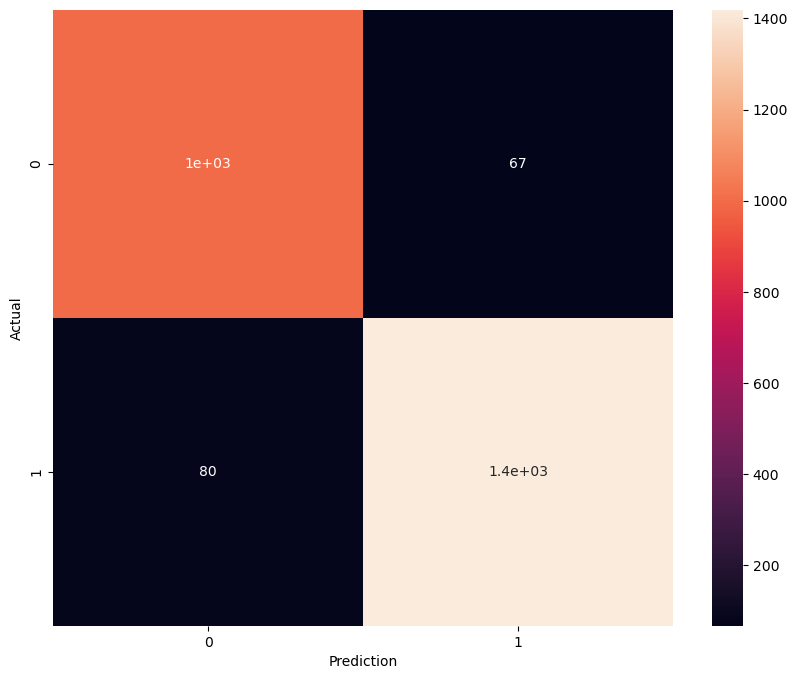

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Actual')